# Notebook 02 — Cleaning & Target

**Goal:** Make a ready-to-model file with a binary `target` and do a quick EDA check.  
**Input:** `../data/processed/hr_attrition.parquet`  
**Output:** `../data/processed/hr_attrition_ready.parquet`  

In [1]:
# Load the processed parquet (fallback to raw CSV) and preview
import pandas as pd
from pathlib import Path

PROC = Path("../data/processed/hr_attrition.parquet")
RAW  = Path("../data/raw/WA_Fn-UseC_-HR-Employee-Attrition.csv")

if PROC.exists():
    df = pd.read_parquet(PROC)
elif RAW.exists():
    df = pd.read_csv(RAW)
else:
    raise SystemExit("No data found. Run Notebook 01 first.")

print(f"Loaded: {len(df):,} rows × {df.shape[1]} columns")
display(df.head()) # small preview
df.isna().sum().sort_values(ascending=False).head(10)
print(df.dtypes.head(12))    # first few dtypes

Loaded: 1,470 rows × 35 columns


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Age                         int64
Attrition                  object
BusinessTravel             object
DailyRate                   int64
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
dtype: object


In [2]:
# Cell 2 — Make binary target and sanity checks
if "Attrition" not in df.columns:
    raise ValueError("Expected column 'Attrition' not found.")

df = df.copy()
df["target"] = df["Attrition"].map({"Yes": 1, "No": 0})

# make sure target is clean
assert df["target"].isin([0,1]).all(), "target must be 0/1"

# simple class blance readout
rate = df["target"].mean()
print(f"Attrition rate: {rate:.2%}  (1 = leave)")
print(df["target"].value_counts().rename({0: "Stay(0)", 1: "Leave(1)"}))

Attrition rate: 16.12%  (1 = leave)
target
Stay(0)     1233
Leave(1)     237
Name: count, dtype: int64


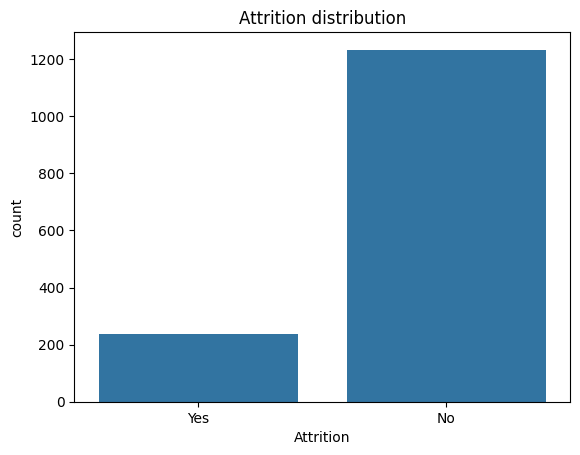

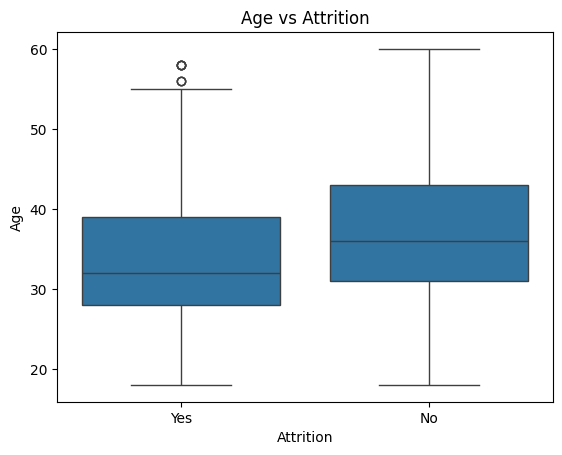

In [4]:
# Tiny EDA plots (optional but nice)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Attrition", data=df)
plt.title("Attrition distribution")
plt.show()

if "Age" in df.columns:
    sns.boxplot(x="Attrition", y="Age", data=df)
    plt.title("Age vs Attrition")
    plt.show()


In [5]:
OUT = Path("../data/processed/hr_attrition_ready.parquet")
df.to_parquet(OUT, index=False)
print(f"✅ Saved ready file → {OUT}")

✅ Saved ready file → ../data/processed/hr_attrition_ready.parquet
